### Configuracion

In [1]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt

from scipy.fft import fft2,ifft2
from skimage.draw import rectangle, line
from skimage.transform import rotate
import skimage.io as io

import os

### Ejemplo de Numeros Imaginarios

In [5]:
x = 5
y = 3

# creamos a z = x + iy
z = x + 1j * y

# imprimimos la parte Real e Imaginaria. T
print("La parte real del numero es:", z.real)
print("La parte imaginaria del numero es:", z.imag)

print()

# Numpy tambien acepta operar con numeros complejos
arregloReales = np.random.randint(size=4,low=-10, high=10)
arregloImaginarios = np.random.randint(size=4,low=-10, high=10) * 1j
arregloComplejo = arregloReales + arregloImaginarios

print("Arreglo Complejo")
print(arregloComplejo)

print("Parte Real")
print(np.real(arregloComplejo))

print("Parte Imaginaria")
print(np.imag(arregloComplejo))

La parte real del numero es: 5.0
La parte imaginaria del numero es: 3.0

Arreglo Complejo
[7.+8.j 6.+3.j 9.+5.j 3.-1.j]
Parte Real
[7. 6. 9. 3.]
Parte Imaginaria
[ 8.  3.  5. -1.]


### 1. Graficar las bases de la Transformada de Fourier de dimensión 8 en 1-D y de dimensión 8 × 8 en 2-D

In [8]:
#Numero de Muestras de la senal
N = 8
#Opciones para graficar
#Velocidad del sampleo
sampleoRate = 1/100
#Cuantos sampleos se haran
sampleoGrafico = int(N/sampleoRate)
#Inicializamos un arreglo para guardar cada base y su evolucion
bases1D = np.zeros((N,sampleoGrafico)) * 1j

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


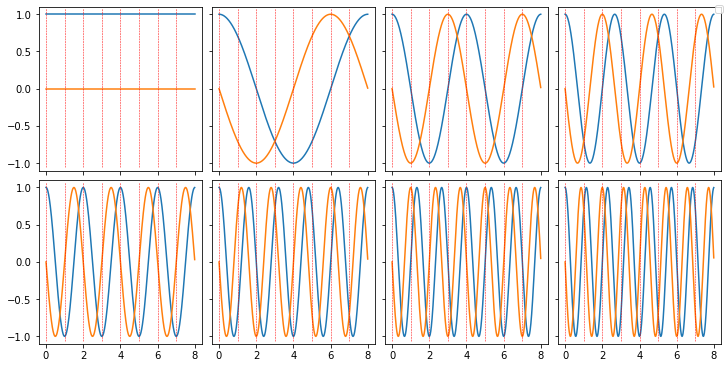

In [9]:
for frecuencia in range(0,N):
    for i in range(sampleoGrafico):
        # Por cada vemos como avanza en el tiempo para luego plotearla
        t = i*sampleoRate
        frecuenciaAngular = ((2*np.pi)/N) * (frecuencia);
        # Calculamos la parte real e imaginaria de la base.
        bases1D[frecuencia][i] = np.exp(-1j * frecuenciaAngular * t)

fig, axes = plt.subplots(2,4, figsize=(10, 5),sharex=True, sharey=True, layout="constrained")
for base in range(N):
    axes[base//4][base%4].plot(np.arange(0,sampleoGrafico*sampleoRate,sampleoRate),np.real(bases1D[base]))
    axes[base//4][base%4].plot(np.arange(0,sampleoGrafico*sampleoRate,sampleoRate),np.imag(bases1D[base]))
    for sample in range(N):
        # Mostramos que valor tiene cada base al momento del sampleo de las N.
        axes[base//4][base%4].axvline(x = sample, ymin=0.02, ymax=0.99  , color = 'r', ls='--', lw=0.5)

fig.legend()

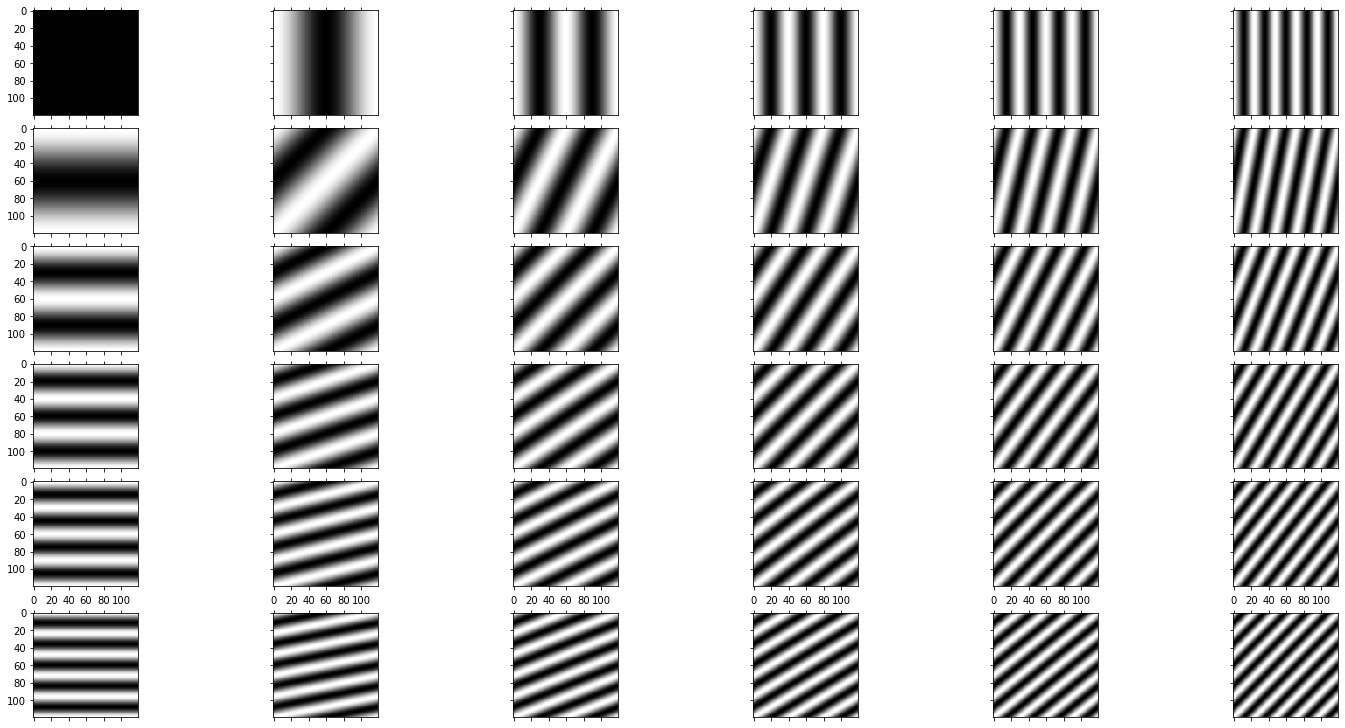

In [10]:
# Ploteo de las bases en 2D
#Definimos el sampleo horizontal y vertical
N = 6
M = 6
#Configuramos los valores para graficar
sampleoRate = 1/20
sampleoGrafico = int(N/sampleoRate)

#Ahora nuestras bases seran matrices, no arreglos
bases2D = np.zeros((N,M,sampleoGrafico,sampleoGrafico)) * 1j

for frecuenciaX in range(0,N):
    for frecuenciaY in range(0,M):
        for intervaloX in range(sampleoGrafico):
            for intervaloY in range(sampleoGrafico):
                # Calculamos como la base avanza en el tiempo y guardamos su valor
                tX = intervaloX*sampleoRate
                tY = intervaloY*sampleoRate
                frecuenciaAngularX = ((2 * np.pi) / N) * frecuenciaX
                frecuenciaAngularY = ((2 * np.pi) / M) * frecuenciaY
                angulo = frecuenciaAngularX * tX + frecuenciaAngularY * tY
                bases2D[frecuenciaX][frecuenciaY][intervaloX][intervaloY] = np.exp(-1j * angulo)

fig, axes = plt.subplots(N,M, figsize=(20, 10),sharex=True, sharey=True, layout="constrained")
for baseX in range(N):
    for baseY in range(M):
        axes[baseX][baseY].matshow(np.real(bases2D[baseX][baseY]),cmap=plt.cm.gray)


### Implementar la DFT en 1D

Visualizacion interactiva entre la relacion de los numeros complejos y los caminos circulares: [betterexplained.com](https://betterexplained.com/examples/fourier/)

In [2]:
"""La funcion debe devolver un arreglo con la magnitud de la frecuencia y tambien su Fase"""
def DFT_1D(senal):
    """
    Realizamos el producto interno entre cada base y la senal original
    Calculamas el modulo y la fase del numero complejo
    """
    N = len(senal)
    mag = np.zeros(N); fas = np.zeros(N)
    for k in range(N):
        suma_real = 0
        suma_imag = 0
        for n in range(N): 
            angulo = 2 * np.pi * k * n / N
            suma_real += senal[n] * np.cos(angulo)
            suma_imag += -senal[n] * np.sin(angulo)

        X_k = suma_real + 1j * suma_imag
        X_k /= np.sqrt(N)
        mag[k] = np.abs(X_k)  
        fas[k] = np.angle(X_k)     
    return mag, fas

In [4]:
senal = np.array([1, 2, 3, 4])

# Implementación propia de DFT
magnitudes_manual, fases_manual = DFT_1D(senal)

# Usamos np.fft.fft para la misma señal
dft_numpy = np.fft.fft(senal)

# Magnitud y fase usando numpy
magnitudes_numpy = np.abs(dft_numpy)
fases_numpy = np.angle(dft_numpy)

inv = np.fft.ifft(dft_numpy)
inv2 = IDFT_1D(magnitudes_manual,fases_manual)

# Comparación
print("Magnitudes (Implementación propia):", magnitudes_manual)
print("Magnitudes (np.fft.fft):", magnitudes_numpy)
print()
print("Fases (Implementación propia):", fases_manual)
print("Fases (np.fft.fft):", fases_numpy)
print()
print("inv" ,inv)
print("inv2", inv2)

Magnitudes (Implementación propia): [5.         1.41421356 1.         1.41421356]
Magnitudes (np.fft.fft): [10.          2.82842712  2.          2.82842712]

Fases (Implementación propia): [ 0.          2.35619449 -3.14159265 -2.35619449]
Fases (np.fft.fft): [ 0.          2.35619449  3.14159265 -2.35619449]

inv [1.+0.j 2.+0.j 3.+0.j 4.+0.j]
inv2 [1.-6.10622664e-16j 2.-1.11022302e-16j 3.-1.11022302e-16j
 4.+2.22044605e-16j]


In [3]:
def IDFT_1D(senalModulo, senalFase):
    """
    Realizamos la sumatoria entre cada base y su proyeccion
    obteniendo la imagen original
    """
    N = len(senalModulo)
    senalRecuperada = np.zeros(N, dtype=complex)

    for n in range(N):
        suma_real = 0
        suma_imag = 0
        for k in range(N):
            angulo = 2 * np.pi * k * n / N
            # Reconstruimos la parte real e imaginaria
            real_k = senalModulo[k] * np.cos(senalFase[k])
            imag_k = senalModulo[k] * np.sin(senalFase[k])
            suma_real += real_k * np.cos(angulo) - imag_k * np.sin(angulo)
            suma_imag += real_k * np.sin(angulo) + imag_k * np.cos(angulo)
        
        senalRecuperada[n] = suma_real + 1j * suma_imag
    
    senalRecuperada /= np.sqrt(N)
    
    return senalRecuperada

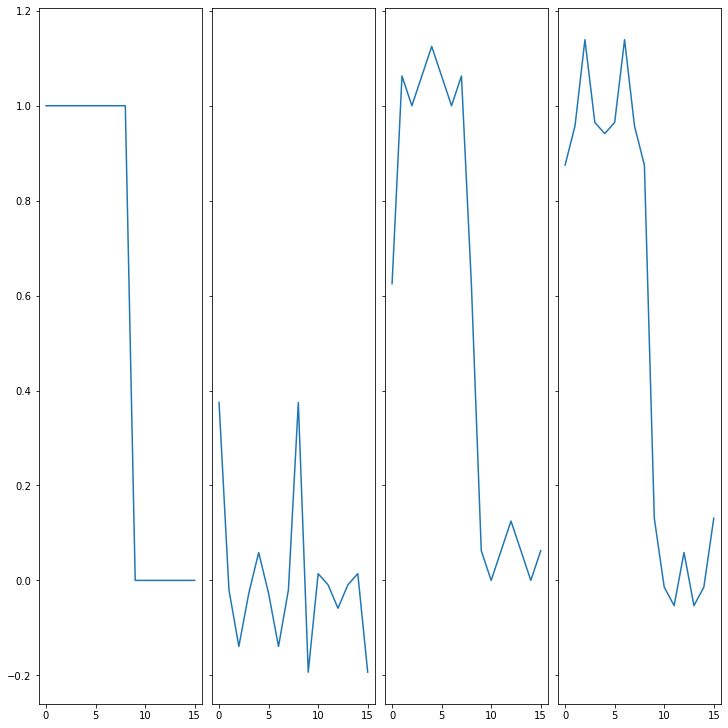

In [5]:
senal = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
senalModulo, senalFase = DFT_1D(senal)
N = len(senal)

## Suprimir Frecuencias Altas
senalModuloSinAltas = senalModulo.copy()
senalModuloSinAltas[senalModulo > np.quantile(senalModulo,0.6)]= 0 
senalSinAltas = IDFT_1D(senalModuloSinAltas,senalFase)

## Suprimir Frecuencias Intermedias
senalModuloSinIntermedias = senalModulo.copy()
senalModuloSinIntermedias[(senalModulo>np.quantile(senalModulo,0.3))&(senalModulo<np.quantile(senalModulo,0.7))] = 0
senalSinIntermedias = IDFT_1D(senalModuloSinIntermedias,senalFase)

## Suprimir Frecuencias Bajas
senalModuloSinBajas = senalModulo.copy()
senalModuloSinBajas[senalModulo<np.quantile(senalModulo,0.4)] = 0 
senalSinBajas = IDFT_1D(senalModuloSinBajas,senalFase)


fig, axes = plt.subplots(1, 4, figsize=(10, 10),sharex=True, sharey=True, layout="constrained")
axes[0].plot(range(senal.shape[0]), senal)
axes[1].plot(range(senal.shape[0]), np.real(senalSinAltas))
axes[2].plot(range(senal.shape[0]), np.real(senalSinIntermedias))
axes[3].plot(range(senal.shape[0]), np.real(senalSinBajas))
plt.show()

## Generar 10 imágenes y hacer la DFT y la IDFT de cada una









Hago la implemetacion de DFT 2D y luego utilizo fft, para los proximos ejercicios, ya que esta optimizado.

In [2]:
"""
Recuerden que DFT devuelve numeros complejos, en este caso querremos devolver 2
matrices, la primera contendra la magnitud del numero en la frecuencia y la segunda
contendra su angulo
"""
def DFT_2D(imagen):
    N,M = imagen.shape
    mag = np.zeros((N,M)); fas = np.zeros((N,M))
    for k in range(N):
        for l in range(M):
            suma_real = 0
            suma_imag = 0
            for n in range(N):
                for m in range(M):
                    angulo = 2 * np.pi * (k*n/N + l*m/M)
                    suma_real += imagen[n,m] * np.cos(angulo)
                    suma_imag += -imagen[n,m] * np.sin(angulo)

            X_k = suma_real + 1j * suma_imag
            X_k /= np.sqrt(N*M)
            mag[k][l] = np.abs(X_k)
            fas[k][l] = np.angle(X_k)
    return mag, fas

def IDFT_2D(frec_mag, frec_ang):
    N,M = frec_mag.shape
    senalRecuperada = np.zeros((N,M), dtype=complex)
    for n in range(N):
        for m in range(M):
            suma_real = 0
            suma_imag = 0
            for k in range(N):
                for l in range(M):
                    angulo = 2 * np.pi * (k*n/N + l*m/M)
                    real_k_l = frec_mag[k][l] * np.cos(frec_ang[k][l])
                    imag_k_l = frec_mag[k][l] * np.sin(frec_ang[k][l])
                    suma_real += real_k_l * np.cos(angulo) - imag_k_l * np.sin(angulo)
                    suma_imag += real_k_l * np.sin(angulo) + imag_k_l * np.cos(angulo)

            senalRecuperada[n][m] = suma_real + 1j * suma_imag
    
    senalRecuperada /= np.sqrt(N*M)
    return senalRecuperada

In [22]:
def dft(img): 
    dft_img = fft2(img)
    mag = np.abs(dft_img); fase = np.angle(dft_img)
    return mag,fase
def idft(mag,fase): 
    x = mag*np.exp(1j*fase)
    return ifft2(x)

In [4]:
def mostrarDFTyIDFT(imagenOriginal):
    ## Aplicar DFS a la imagen
    dfsImagenMagnitud, dfsImagenPhase = dft(imagenOriginal)
    imagenReconstruida = idft(dfsImagenMagnitud, dfsImagenPhase)

    fig, axes = plt.subplots(2,2, figsize=(10, 10),sharex=True, sharey=True, layout="constrained")
    axes[0][0].matshow(imagenOriginal, cmap=plt.cm.gray)
    axes[0][1].matshow(np.fft.fftshift(np.log10(dfsImagenMagnitud+1)), cmap=plt.cm.gray)
#     axes[0][1].matshow(np.log10(dfsImagenMagnitud+1), cmap=plt.cm.gray)
    axes[1][0].matshow(dfsImagenPhase, cmap=plt.cm.gray)
    axes[1][1].matshow(np.real(imagenReconstruida), cmap=plt.cm.gray)

In [5]:
def mostrarV(img_original): 
    dfs_img = fft2(img_original)
    dfs_mag = np.abs(dfs_img)
    dfs_phase = np.angle(dfs_img)
#     inv = np.fft.ifft(dfs_img)
    inv = IDFT_2D(dfs_mag,dfs_phase)
    fig, axes = plt.subplots(2,2, figsize=(10, 10),sharex=True, sharey=True, layout="constrained")
    axes[0][0].matshow(img_original, cmap=plt.cm.gray)
    axes[0][1].matshow(dfs_mag, cmap=plt.cm.gray)
    axes[1][0].matshow(dfs_phase, cmap=plt.cm.gray)
    axes[1][1].matshow(np.real(inv), cmap=plt.cm.gray)

Mostramos para N = 10, con nuestra implementacion, pareciera estar bien.

Notar que no hacemos el shifting para centrar los frecuencias bajas 

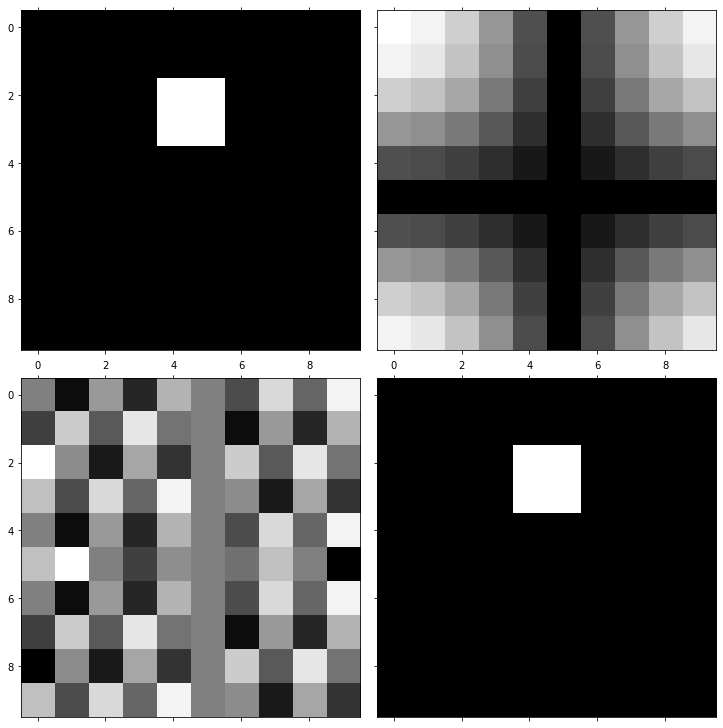

In [38]:
# Indicamos el tamano de la imagen
dimensionImagen = 10

#### Cuadrado transladado ####
# Creamos una imagen vacia
imagenCuadradoTransladado = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
# Iniciamos donde estará el cuadrado
start = (2,4)
# Dado el tamaño de los lados y su punto de inicio, nos devuelve las filas y columnas que ocupará
rr, cc = rectangle(start, extent=(2, 2), shape=imagenCuadradoTransladado.shape)
# Pintamos esas celdas de blanco
imagenCuadradoTransladado[rr, cc] = 255

# Mostramos DFT e IDFT
mostrarV(imagenCuadradoTransladado / 255)

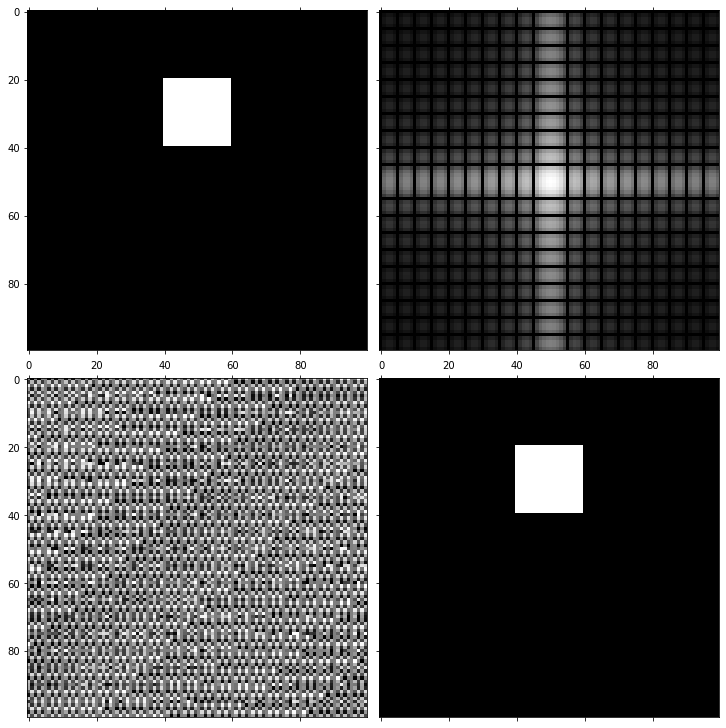

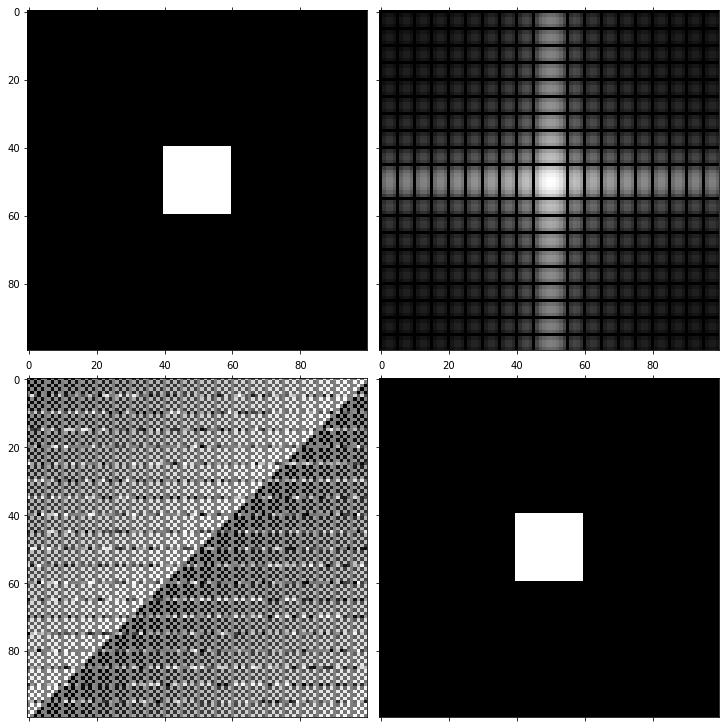

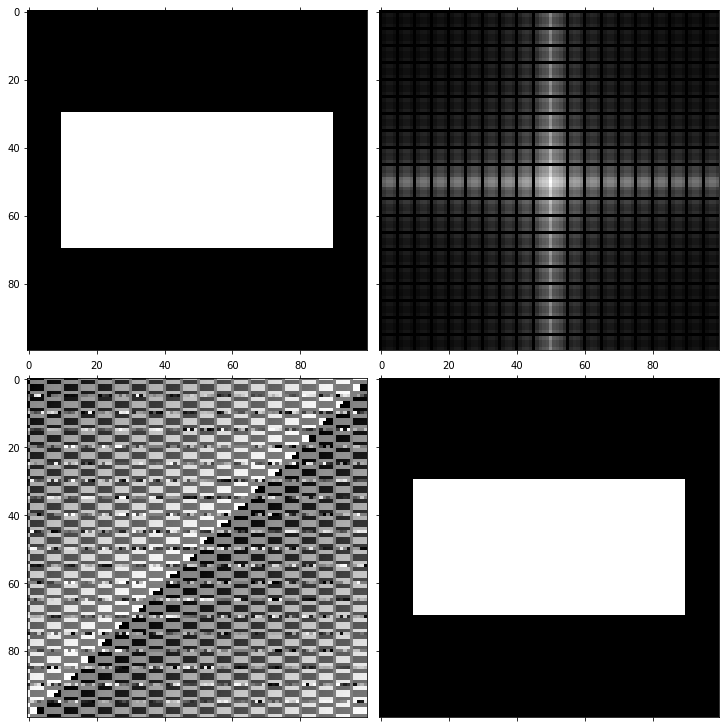

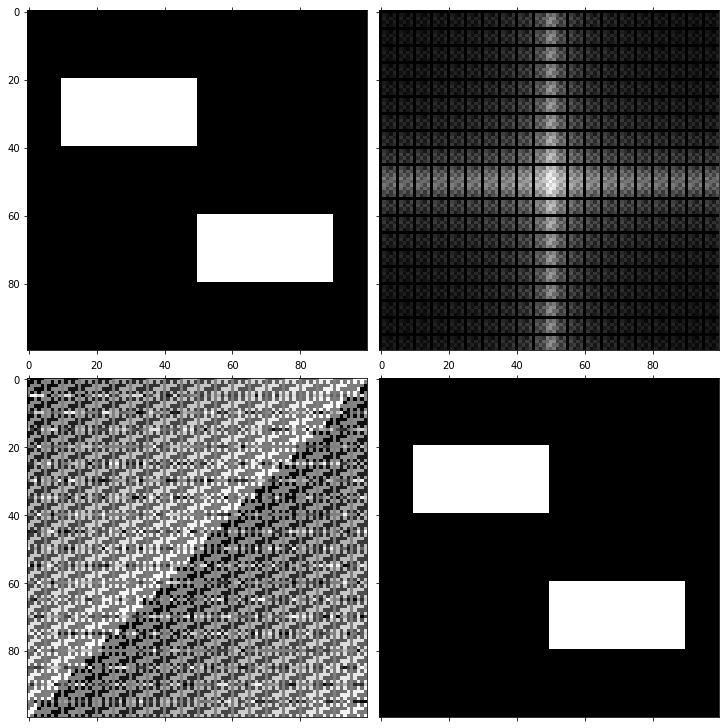

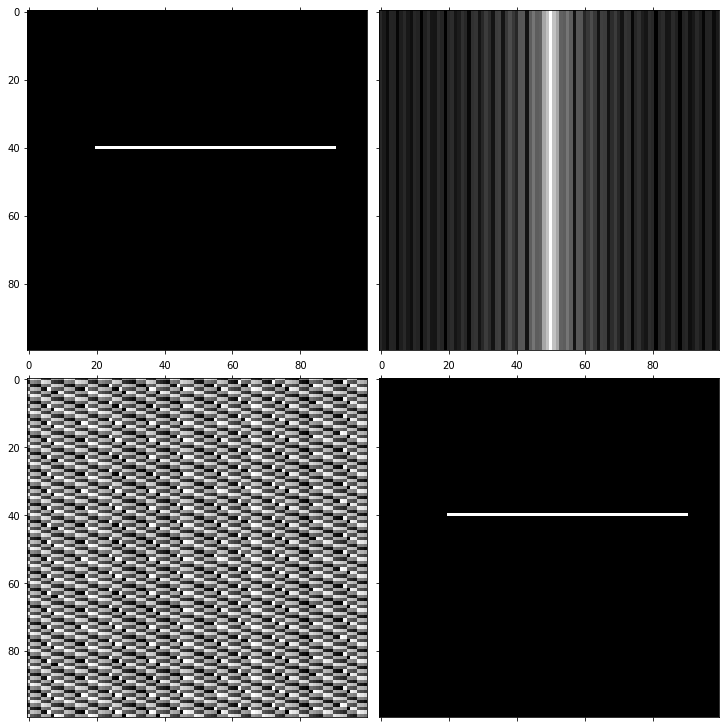

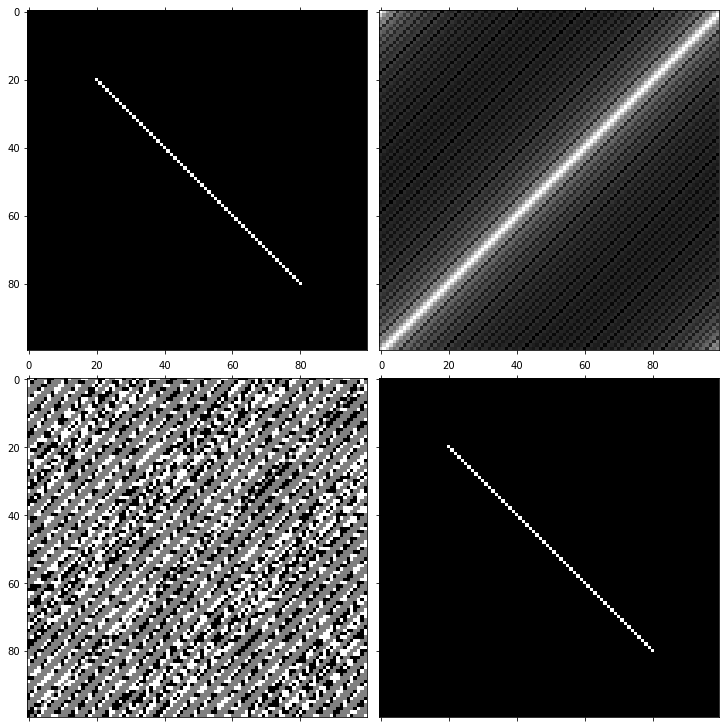

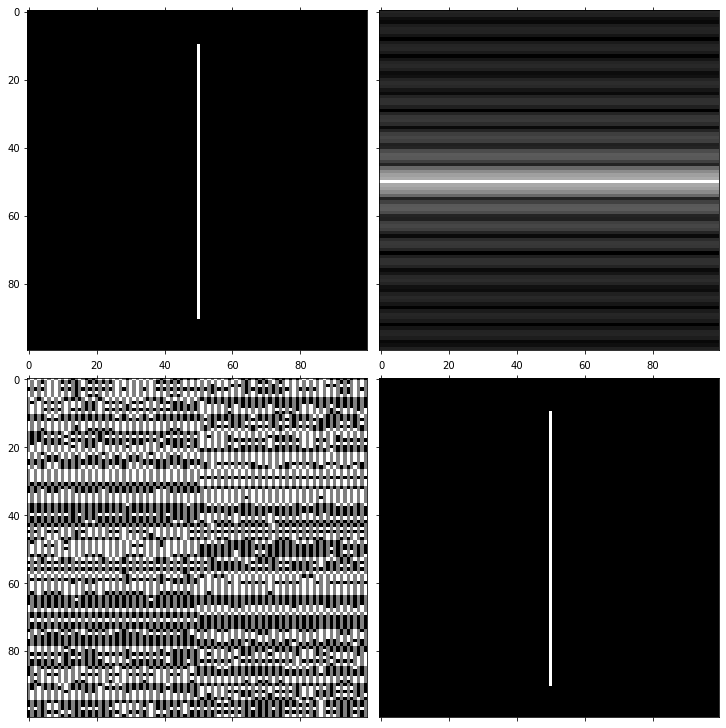

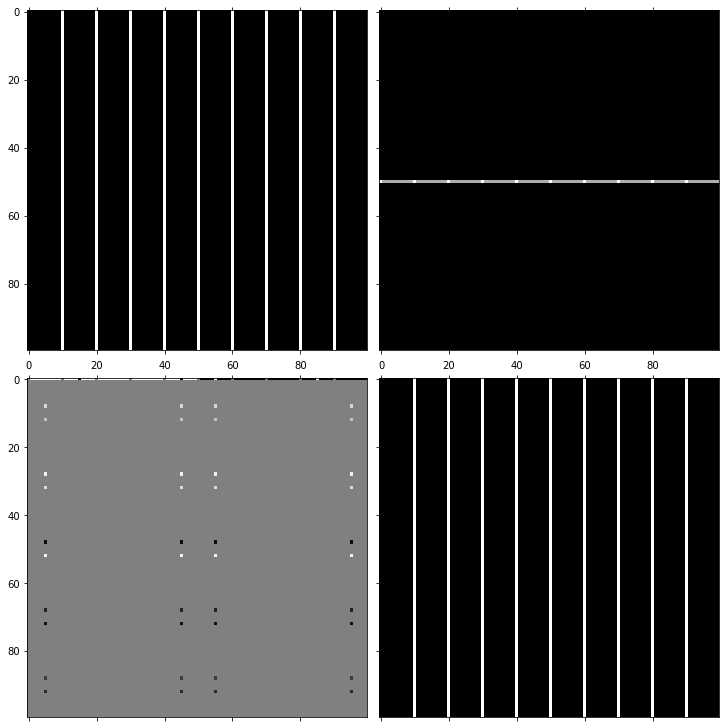

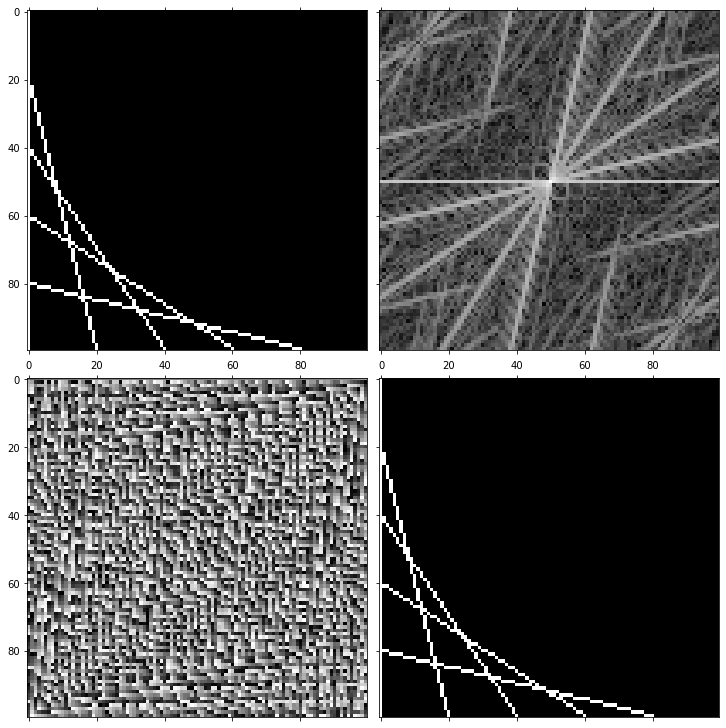

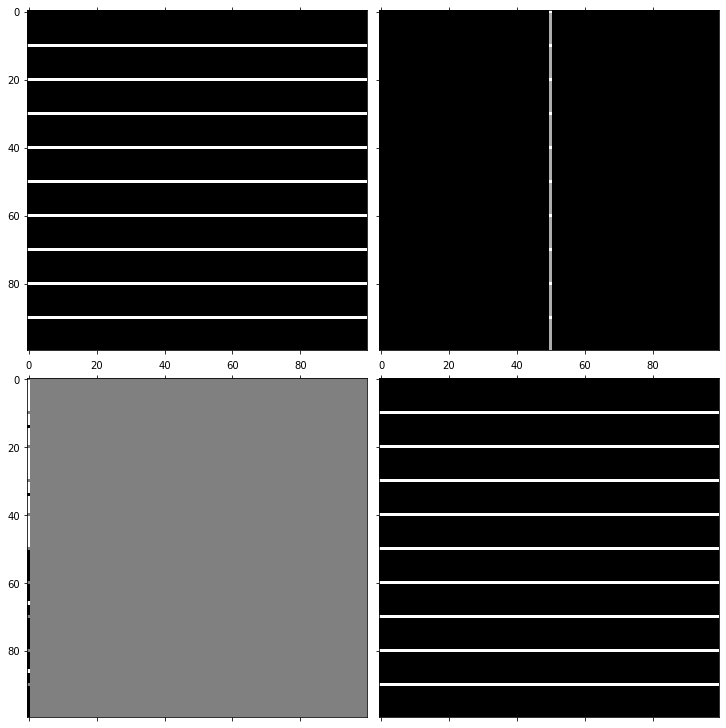

In [33]:
# Indicamos el tamano de la imagen
dimensionImagen = 100

#### Cuadrado transladado ####
# Creamos una imagen vacia
imagenCuadradoTransladado = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
# Iniciamos donde estará el cuadrado
start = (20,40)
# Dado el tamaño de los lados y su punto de inicio, nos devuelve las filas y columnas que ocupará
rr, cc = rectangle(start, extent=(20, 20), shape=imagenCuadradoTransladado.shape)
# Pintamos esas celdas de blanco
imagenCuadradoTransladado[rr, cc] = 255

# Mostramos DFT e IDFT
mostrarDFTyIDFT(imagenCuadradoTransladado / 255)

#### Cuadrado central ####
imagenCuadradoCentral = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
# Posicionamos el cuadrado en el centro de la imagen
rr, cc = rectangle((40, 40), extent=(20, 20), shape=imagenCuadradoCentral.shape)
imagenCuadradoCentral[rr, cc] = 255

mostrarDFTyIDFT(imagenCuadradoCentral / 255)

#### Rectángulo ####
imagenRectangulo = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
# Definir un rectángulo
rr, cc = rectangle((30, 10), extent=(40, 80), shape=imagenRectangulo.shape)
imagenRectangulo[rr, cc] = 255

mostrarDFTyIDFT(imagenRectangulo / 255)

#### 2 Rectángulos ####
imagenDosRectangulo = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
# Definir dos rectángulos
rr, cc = rectangle((20, 10), extent=(20, 40), shape=imagenDosRectangulo.shape)
imagenDosRectangulo[rr, cc] = 255
rr, cc = rectangle((60, 50), extent=(20, 40), shape=imagenDosRectangulo.shape)
imagenDosRectangulo[rr, cc] = 255

mostrarDFTyIDFT(imagenDosRectangulo / 255)

#### Línea vertical ####
imagenLineaVertical = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
# Definir una línea vertical
rr, cc = line(40, 20, 40, 90)
imagenLineaVertical[rr, cc] = 255

mostrarDFTyIDFT(imagenLineaVertical / 255)

#### Línea a 45 grados ####
imagenLinea45 = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
# Definir una línea a 45 grados
rr, cc = line(20, 20, 80, 80)
imagenLinea45[rr, cc] = 255

mostrarDFTyIDFT(imagenLinea45 / 255)

#### Línea a 90 grados ####
imagenLinea90 = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
# Definir una línea a 90 grados
rr, cc = line(10, 50, 90, 50)
imagenLinea90[rr, cc] = 255

mostrarDFTyIDFT(imagenLinea90 / 255)

#### Varias líneas ####
imagenVariasLineas = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
# Varias líneas verticales
for i in range(10, dimensionImagen, 10):
    rr, cc = line(0, i, 99, i)
    imagenVariasLineas[rr, cc] = 255

mostrarDFTyIDFT(imagenVariasLineas / 255)

#### Varias líneas a 45 grados ####
imagenVariasLineas45 = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
# Varias líneas a 45 grados
for i in range(0, dimensionImagen, 20):
    rr, cc = line(i, 0, 99, i)
    imagenVariasLineas45[rr, cc] = 255

mostrarDFTyIDFT(imagenVariasLineas45 / 255)

#### Varias líneas a 90 grados ####
imagenVariasLineas90 = np.zeros((dimensionImagen, dimensionImagen), dtype=np.uint8)
# Varias líneas horizontales
for i in range(10, dimensionImagen, 10):
    rr, cc = line(i, 0, i, 99)
    imagenVariasLineas90[rr, cc] = 255

mostrarDFTyIDFT(imagenVariasLineas90 / 255)


## Hacer la Transformada de Fourier de dos imágenes dadas (I1 e I2)

1.   Visualizar el módulo y la fase de cada una
2.   Realizar IDFS utilizando el modulo de I1 y la fase de I2
3.   Realizar IDFS utilizando el modulo de I2 y la fase de I1

Analizar el aporte del módulo y la fase en cada caso

In [6]:
def inter(shapeA,shapeB):
    filas_A, cols_A = shapeA
    filas_B, cols_B = shapeB

    fil_inter = min(filas_A, filas_B)
    col_inter = min(cols_A, cols_B)

    return fil_inter, col_inter

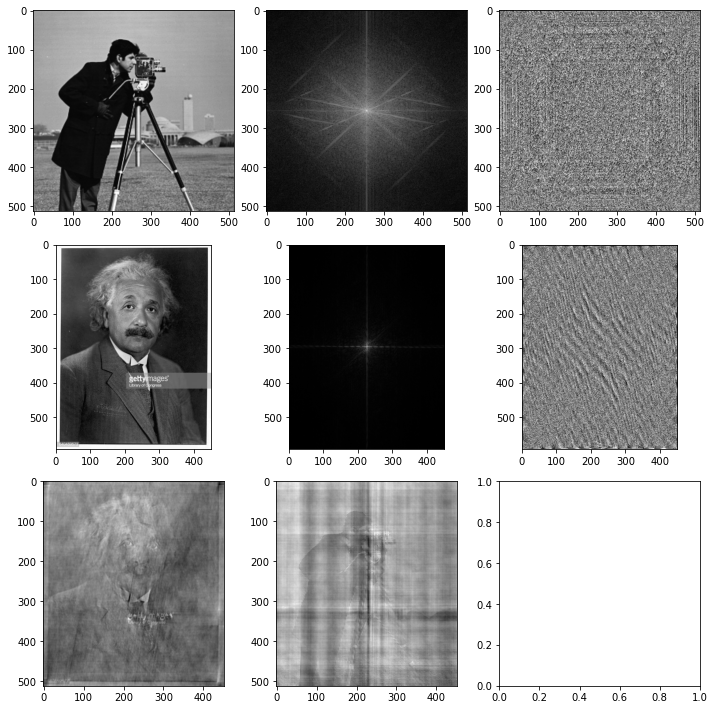

In [40]:
imagenUnoFilename = os.path.join("Imagenes de pruebas", 'cameraman.jpg')
imagenUno = io.imread(imagenUnoFilename, as_gray=True).astype(np.float64)
imagenUno /= 255

imagenDosFilename = os.path.join("Imagenes de pruebas", 'einstein.jpg')
imagenDos = io.imread(imagenDosFilename, as_gray=True).astype(np.float64)
imagenDos /= 255

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

imagenUno_modulo, imagenUno_fase = dft(imagenUno)
axes[0][0].imshow(imagenUno, cmap=plt.cm.gray)
axes[0][1].imshow(np.fft.fftshift(np.log10(imagenUno_modulo+1)), cmap=plt.cm.gray)
axes[0][2].imshow(imagenUno_fase, cmap=plt.cm.gray)

imagenDos_modulo, imagenDos_fase = dft(imagenDos)
axes[1][0].imshow(imagenDos, cmap=plt.cm.gray)
axes[1][1].imshow(np.fft.fftshift(np.log10(imagenDos_modulo+1)), cmap=plt.cm.gray)
axes[1][2].imshow(imagenDos_fase, cmap=plt.cm.gray)

f,c = inter(imagenDos_modulo.shape,imagenUno_modulo.shape)
f1,c1 = inter(imagenDos_fase.shape,imagenUno_fase.shape)

com1 = idft(imagenUno_modulo[:f,:c],imagenDos_fase[:f,:c])
com2 = idft(imagenDos_modulo[:f1,:c1],imagenUno_fase[:f1,:c1])

axes[2][0].imshow(np.real(com1),cmap=plt.cm.gray)
axes[2][1].imshow(np.real(com2),cmap=plt.cm.gray)
#axes[2][2].imshow(,cmap=plt.cm.gray)
fig.tight_layout()
plt.show()

### Componer una imagen con Cameraman y líneas horizontales (sumarlas), y remover las líneas usando la transformada de Fourier.

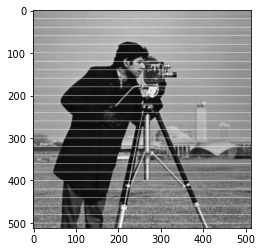

In [82]:
# Abrir la imagen
imagenUnoFilename = os.path.join("Imagenes de pruebas", 'cameraman.jpg')
imagenUno = io.imread(imagenUnoFilename, as_gray=True).astype(np.float64)
imagenUno /= 255
# Agregan las lineas horizontales
lineas_h = np.zeros_like(imagenUno)
espacio_entre_lineas = 20 ; grosor_linea = 1

for i in range(0, imagenUno.shape[0], espacio_entre_lineas):
    lineas_h[i:i+grosor_linea, :] = 1  
    
img_lineas = np.clip(imagenUno + lineas_h, 0, 1) 

# Realizan la transformacion de Fourier
mag,fase = dft(img_lineas)

# magl,fasel = dft(lineas_h)
# magl[magl!=0] = 1e-1000
# magl[magl==0] = 1 

#imgrev = idft(mag*magl,fase)

# Analizen las funciones devueltas y piensen si pueden detectar que frecuencia estan 
# asociadas a las lineas
#mostrarDFTyIDFT(img_lineas)

#mostrarDFTyIDFT(imgrev)
# mostra
# Eliminen las lineas

# for i in range(0, imagenUno.shape[0], espacio_entre_lineas):
#     mag[i:i+grosor_linea,0:10] = 0

for i in range(0, imagenUno.shape[0], espacio_entre_lineas):
    mag[i:i+grosor_linea, 0] = 0  

img = idft(mag,fase)

plt.plot()
plt.imshow(np.real(img),cmap="gray")

# Ploteen el resutado en un subplot de 3, 2. La primer fila mostrando la imagen original,
# las lineas por separado y la composicion

# La segunda fila mostrando la funcion el plano de modulo, fase y la imagen sin las lineas

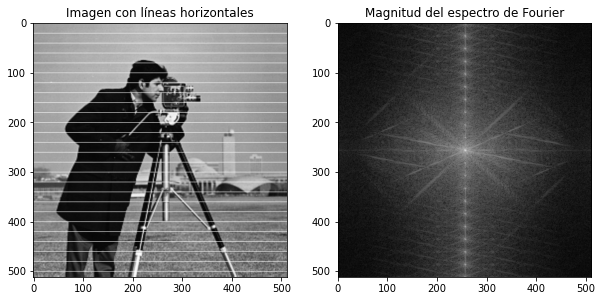

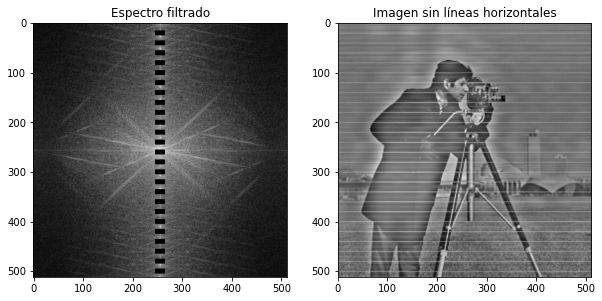

In [85]:
imagenUnoFilename = os.path.join("Imagenes de pruebas", 'cameraman.jpg')
imagenUno = io.imread(imagenUnoFilename, as_gray=True).astype(np.float64)
imagenUno /= 255

# Agregar líneas horizontales
lineas_h = np.zeros_like(imagenUno)
espacio_entre_lineas = 20
grosor_linea = 1

for i in range(0, imagenUno.shape[0], espacio_entre_lineas):
    lineas_h[i:i+grosor_linea, :] = 1  

# Componer la imagen con líneas
img_lineas = np.clip(imagenUno + lineas_h, 0, 1)

# Realizamos la Transformada de Fourier 2D
F = fft2(img_lineas)
F_shifted = np.fft.fftshift(F)  # Centramos las bajas frecuencias

# Mostrar la magnitud del espectro de Fourier
magnitude_spectrum = np.log(np.abs(F_shifted) + 1)

# Graficar la imagen con líneas y su espectro
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Imagen con líneas horizontales")
plt.imshow(img_lineas, cmap='gray')

plt.subplot(1,2,2)
plt.title("Magnitud del espectro de Fourier")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

# Filtrar las frecuencias relacionadas con las líneas horizontales
# Se identifican como picos verticales cerca del centro del espectro
rows, cols = F_shifted.shape
center_row, center_col = rows // 2, cols // 2

# Crear una máscara que bloquea las frecuencias no deseadas
mask = np.ones_like(F_shifted)

# Ajustar los parámetros según las frecuencias de las líneas
ancho_banda = 10  # Ajustar dependiendo de la intensidad de las líneas
for i in range(0, imagenUno.shape[0], espacio_entre_lineas):
    mask[i-5*grosor_linea:i+5*grosor_linea,center_row-ancho_banda:center_row+ancho_banda] = 0  # Bloqueamos las frecuencias de las líneas

# Aplicar la máscara al espectro de Fourier
F_shifted_filtered = F_shifted * mask

# Transformada inversa de Fourier para recuperar la imagen sin líneas
F_filtered = np.fft.ifftshift(F_shifted_filtered)
img_sin_lineas = np.real(ifft2(F_filtered))

# Mostrar la imagen restaurada
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Espectro filtrado")
plt.imshow(np.log(np.abs(F_shifted_filtered) + 1), cmap='gray')

plt.subplot(1,2,2)
plt.title("Imagen sin líneas horizontales")
plt.imshow(img_sin_lineas, cmap='gray')

plt.show()
